# Hand Written Digit Recognization

### Import relevant libraries and packages

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

### Load the MNIST dataset
Here, Using the MNIST dataset.

In [2]:
mnist = keras.datasets.mnist
(train_image,train_label),(test_image,test_label) = mnist.load_data()

#### Display all the labels

In [3]:
print("Labels in the training set:")
for label in set(train_label):
    print(label)

Labels in the training set:
0
1
2
3
4
5
6
7
8
9


#### Display 5 random training images and labels

Random training images and labels:


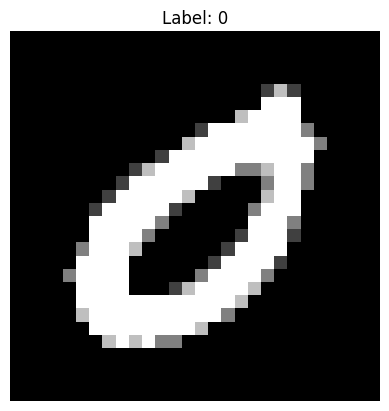

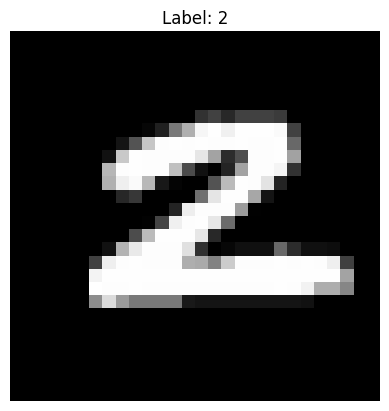

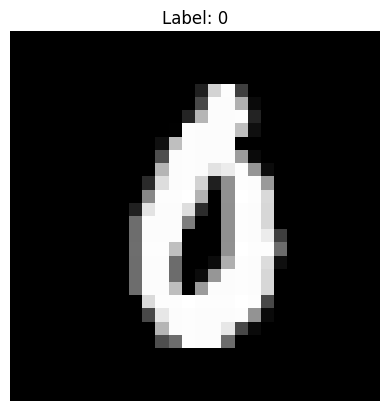

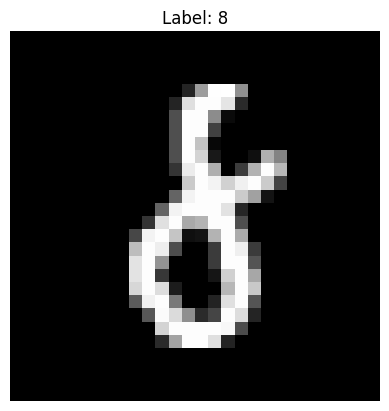

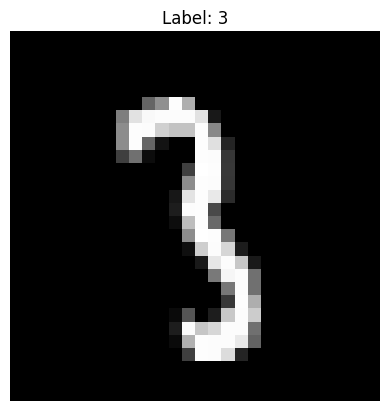

In [4]:
random_indices = np.random.choice(len(train_image), 5, replace=False)

print("Random training images and labels:")
for index in random_indices:
    img = train_image[index]
    label = train_label[index]
    
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

### Preprocess the data
Preprocessing the data by dividing the pixel values by 255 to normalize them.

In [5]:
train_image = train_image/255.0
test_image = test_image/255.0

### Build the model
We define a sequential model using the keras.Sequential class.
The model consists of a flatten layer to convert the 2D image data into a 1D array, a dense layer with 128 neurons and ReLU activation, and a dense layer with 10 neurons (representing the 10 digits) and softmax activation.

In [6]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

#### Display the model summary

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


After defining the model, we compile it with the Adam optimizer, sparse categorical cross-entropy loss function, and accuracy metric.

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model and evaluate the results
We train the model using the fit method, specifying the training images and labels, the number of epochs and evaluating the testing images and labels.

In [9]:
history = model.fit(train_image, train_label, epochs=10, validation_data=(test_image, test_label))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2219 - accuracy: 0.9342 - val_loss: 0.1176 - val_accuracy: 0.9617
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0926 - accuracy: 0.9711 - val_loss: 0.0829 - val_accuracy: 0.9743
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0641 - accuracy: 0.9801 - val_loss: 0.0819 - val_accuracy: 0.9753
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0514 - accuracy: 0.9833 - val_loss: 0.0902 - val_accuracy: 0.9712
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0395 - accuracy: 0.9871 - val_loss: 0.0773 - val_accuracy: 0.9784
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0329 - accuracy: 0.9893 - val_loss: 0.0875 - val_accuracy: 0.9774
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0263 - accuracy: 0.9912 - val_loss: 0.0905 - val_accuracy

#### Plot the Results

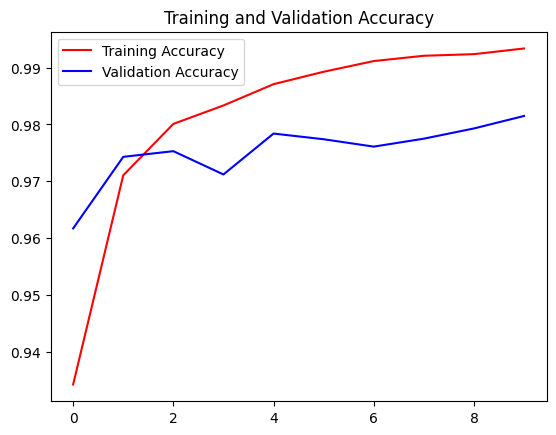

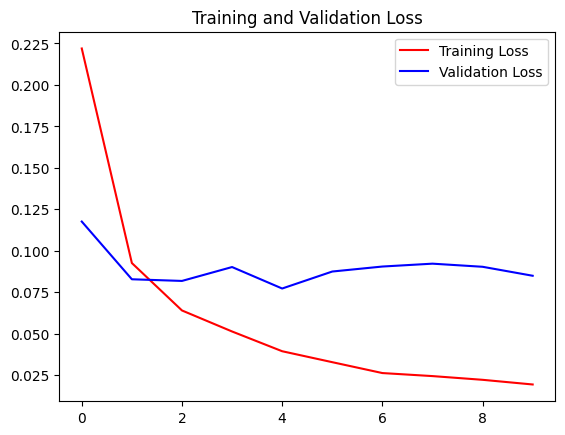

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend(loc=0)

plt.show()

### Model Prediction
Finally, we make predictions on the test images using the predict method and display a few sample predictions by comparing the predicted labels with the actual labels.

In [11]:
predictions = model.predict(test_image)

for i in range(5):
    predicted_label = tf.argmax(predictions[i])
    actual_label = test_label[i]
    print('Predicted:', predicted_label.numpy())
    print('Actual:', actual_label)

313/313 [==============================] - 1s 3ms/step
Predicted: 7
Actual: 7
Predicted: 2
Actual: 2
Predicted: 1
Actual: 1
Predicted: 0
Actual: 0
Predicted: 4
Actual: 4
